In [57]:
def loadDataSet():                         #定义加载数据函数
    dataMat = []                           #定义dataMat列表用来存放特征
    labelMat = []                          #定义labelMat列表用来存放标签
    fr = open('testSet.txt')              #jupyter只能读取Home目录下的文件，所以在home里上传数据集
    for line in fr.readlines():           #readlines()读取所有行，并以每行作为一个元素保存到数组line，这里对数组进行遍历
        lineArr = line.strip().split()     #strip()方法用来去除头尾的空格或换行，split()以空格将他们分开，保存在一个列表lineArr中
        dataMat.append([1.0,float(lineArr[0]),float(lineArr[1])])   #将1.0，lineArr的第一元素，第二个元素组成一个列表加入dataMat中
        labelMat.append(int(lineArr[2]))   #将linearr的第3个元素加入labelMat列表中
    fr.close()                             #关闭文件，一般读取了文件后要关闭文件，防止占用内存
    return dataMat,labelMat                    #返回dataMat，labelMat列表

In [58]:
from math import exp

In [59]:
import numpy as np
def sigmoid(inx):
    return 1.0/(1+np.exp(-inx))
    

In [60]:
def gradAscent(dataMatIn,classLabels):
    dataMatrix = np.mat(dataMatIn)                #将特征数据转成m*3矩阵
    labelMat =np.mat(classLabels).transpose()     #将标签列表转换成m*1矩阵
    m,n = np.shape(dataMatrix)           #计算矩阵的行和列
    alpha = 0.001
    maxCycles = 500
    weights = np.ones((n,1))         #先将权重全部设为1，n行1列
    for k in range(maxCycles):
        h = sigmoid(dataMatrix*weights)
        error = (labelMat-h)
        weights = weights + alpha*dataMatrix.transpose()*error    #梯度上升算法，结合最大似然函数
    return weights

In [61]:
dataArr,labelMat = loadDataSet()
gradAscent(dataArr,labelMat)        #计算出权重

matrix([[ 4.12414349],
        [ 0.48007329],
        [-0.6168482 ]])

In [62]:
print(dataArr)

[[1.0, -0.017612, 14.053064], [1.0, -1.395634, 4.662541], [1.0, -0.752157, 6.53862], [1.0, -1.322371, 7.152853], [1.0, 0.423363, 11.054677], [1.0, 0.406704, 7.067335], [1.0, 0.667394, 12.741452], [1.0, -2.46015, 6.866805], [1.0, 0.569411, 9.548755], [1.0, -0.026632, 10.427743], [1.0, 0.850433, 6.920334], [1.0, 1.347183, 13.1755], [1.0, 1.176813, 3.16702], [1.0, -1.781871, 9.097953], [1.0, -0.566606, 5.749003], [1.0, 0.931635, 1.589505], [1.0, -0.024205, 6.151823], [1.0, -0.036453, 2.690988], [1.0, -0.196949, 0.444165], [1.0, 1.014459, 5.754399], [1.0, 1.985298, 3.230619], [1.0, -1.693453, -0.55754], [1.0, -0.576525, 11.778922], [1.0, -0.346811, -1.67873], [1.0, -2.124484, 2.672471], [1.0, 1.217916, 9.597015], [1.0, -0.733928, 9.098687], [1.0, -3.642001, -1.618087], [1.0, 0.315985, 3.523953], [1.0, 1.416614, 9.619232], [1.0, -0.386323, 3.989286], [1.0, 0.556921, 8.294984], [1.0, 1.224863, 11.58736], [1.0, -1.347803, -2.406051], [1.0, 1.196604, 4.951851], [1.0, 0.275221, 9.543647], [1.0,

In [63]:
dataMat = np.array(dataArr)
print(np.shape(dataMat))

(100, 3)


In [64]:
def plotBestFit(weights):
    import matplotlib.pyplot as plt
    dataMat,labelMat = loadDataSet()
    dataArr = array(dataMat)
    n =np.shape(dataArr)[0]
    xcord1 = [];ycord1 = []
    xcord2 = [];ycord2 = []
    for i in range(n):
        if int(labelMat[i])==1:
            xcord1.append((dataArr[i][1]));ycord1.append((dataArr[i][2]))
        else:
            xcord2.append((dataArr[i][1]));ycord2.append((dataArr[i][2]))
    fig = plt.figure()   #在Matplotlib中，整个图像为figure（重命名fig）对象
    ax = fig.add_subplot(111)  #ax为绘制区域，每个fig对象有1个或多个绘制区域（ax)，每个ax都是拥有一个自己坐标系统的绘制区域
    ax.scatter(xcord1,ycord1,s=30,c='red',marker='s')    #scatter为绘制散点图函数，s=30为点的大小，marker=s意为将点标记为正方形
    ax.scatter(xcord2,ycord2,s=30,c='green')
    x=arange(-3.0,3.0,0.1)     #x轴的范围为-3到3，间隔为0.1
    y=(-weights[0]-weights[1]*x)/weights[2]     #令W0+W1X1+W2XW2=0，0是两个类别的分界处，
    ax.plot(x,y)       #将x，y传给plot函数，绘制图形
    plt.xlabel('X1');plt.ylabel('X2')
    plt.show()  #显示图形

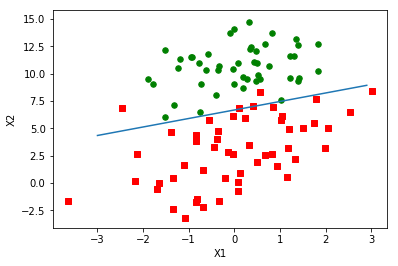

In [65]:
from numpy import * 
weights = gradAscent(dataArr,labelMat)
plotBestFit(weights.getA())    #getA函数用来将矩阵转换成数组